# Forkast

## Reservation forecast to help restaurants

### Library install

In [1]:
#!pip install pandas
!pip install odfpy
!pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 KB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=396a47d3951a7c9899eb539e256179266fcce6e9400a6da7485b2cda56db195f
  Stored in directory: /root/.cache/pip/wheels/20/ff/69/1b3f423ffe400b87afa368c70b43d2b5cd3bfb9ac8a613ba5b
Successfully built odfpy
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 47.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
import numpy as np

import csv
# %run weather_connector.ipynb     
%run lib/parsing_couverts.ipynb
%run lib/display.ipynb


### Import restaurant data

In [3]:
couverts=pd.read_excel("marcello_data/couverts.ods", engine="odf")
location='Paris, France'
couverts['Jour']=pd.to_datetime(couverts['Jour'], utc=True)


In [4]:
display(couverts)

,service,Couverts,Taux de remplissage,Jour
0,Déjeuner,46,41,2022-07-31 22:00:00+00:00
1,Dîner,81,40,2022-07-31 22:00:00+00:00
2,Autres,20,10,2022-07-30 22:00:00+00:00
3,Déjeuner,99,90,2022-07-30 22:00:00+00:00
4,Dîner,170,85,2022-07-30 22:00:00+00:00
...,...,...,...,...
1508,Dîner,15,7,2019-12-22 23:00:00+00:00
1509,Dîner,22,11,2019-12-21 23:00:00+00:00
1510,Dîner,14,7,2019-12-20 23:00:00+00:00
1511,Déjeuner,2,1,2019-12-19 23:00:00+00:00


In [5]:
_deepnote_run_altair(couverts, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Jour","type":"temporal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Couverts","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

### Data engineering

In [6]:
couverts['weekend'] = couverts['Jour'].apply(lambda x: x.weekday() >= 5)
couverts['weekday'] = couverts['Jour'].apply(lambda x: x.weekday() < 5)

couverts['couverts_weekend'] = np.where(couverts['weekend'], couverts['Couverts'], None)
couverts['couverts_weekday'] = np.where(couverts['weekday'], couverts['Couverts'], None)


In [7]:
couvert_dejeuner,date_dejeuner=couverts_conditionnel(couverts['Couverts'],couverts['service'],'Déjeuner',couverts['Jour'])
couvert_diner,date_diner=couverts_conditionnel(couverts['Couverts'],couverts['service'],'Dîner',couverts['Jour'])
couvert_autres, date_autres = couverts_conditionnel(couverts['Couverts'],couverts['service'],'Autres',couverts['Jour'])
# date_autres=pd.to_datetime(date_autres)
couverts_journees, journees = couverts_totaux()

couvert_weekend_dejeuner,date_weekend_dejeuner=couverts_conditionnel(couverts['couverts_weekend'],couverts['service'],'Déjeuner',couverts['Jour'])
couvert_weekday_dejeuner,date_weekday_dejeuner=couverts_conditionnel(couverts['couverts_weekday'],couverts['service'],'Déjeuner',couverts['Jour'])
couvert_weekend_diner,date_weekend_diner=couverts_conditionnel(couverts['couverts_weekend'],couverts['service'],'Dîner',couverts['Jour'])
couvert_weekday_diner,date_weekday_diner=couverts_conditionnel(couverts['couverts_weekday'],couverts['service'],'Dîner',couverts['Jour'])


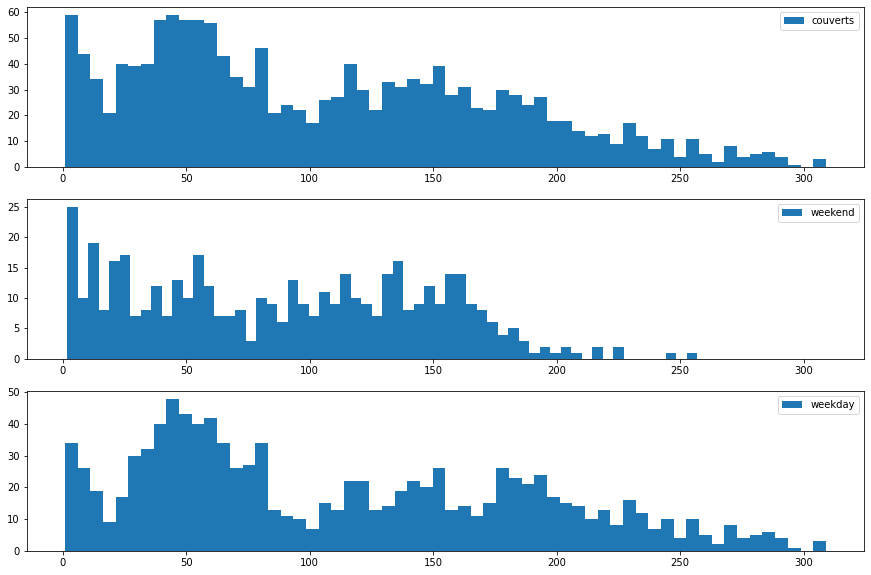

In [8]:
plt.figure(figsize=(15,10),facecolor="w")
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2,sharex=ax1)
ax3 = plt.subplot(3,1,3,sharex=ax1)


repartition_couverts = ax1.hist(couverts['Couverts'],bins=60,label='couverts')
repartition_couverts_weekend=ax2.hist([x for x in couverts['couverts_weekend'] if x!= None],bins=60,label='weekend')
repartition_couverts_weekday=ax3.hist([x for x in couverts['couverts_weekday'] if x != None], bins=60, label='weekday')


ax1.legend()
ax2.legend()
ax3.legend()



In [9]:

from datetime import datetime as _deepnote_datetime
start_date = _deepnote_datetime.strptime('2021-07-02T00:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%fZ")


In [10]:

from datetime import datetime as _deepnote_datetime
end_date = _deepnote_datetime.strptime('2022-07-01T00:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%fZ")


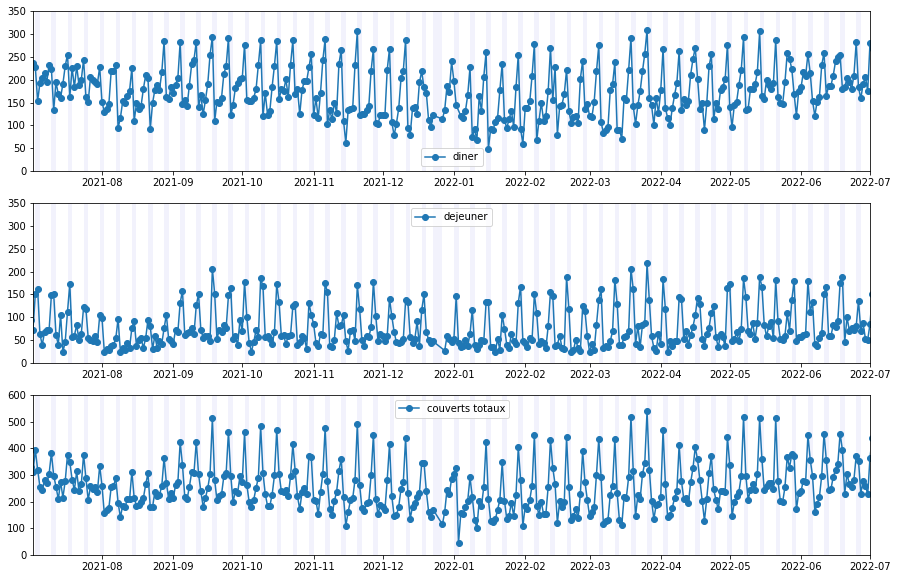

In [11]:

plt.figure(figsize=(15,10),facecolor="w")
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2,sharex=ax1)
ax3 = plt.subplot(3,1,3,sharex=ax1)

ax1.set_xlim([start_date,end_date])
ax2.set_xlim([start_date,end_date])
ax3.set_xlim([start_date,end_date])

ax1.set_ylim([0,350])
ax2.set_ylim([0,350])
ax3.set_ylim([0,600])

weekend_indices = find_weekend_indices(couverts['Jour'])
highlight_datetimes(weekend_indices, ax1)
highlight_datetimes(weekend_indices, ax2)
highlight_datetimes(weekend_indices, ax3)

ax1.plot(date_diner, couvert_diner,label='diner', marker='o')
ax2.plot(date_dejeuner,couvert_dejeuner,label='dejeuner', marker='o')
ax3.plot(journees,couverts_journees,label='couverts totaux', marker='o')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()


In [12]:
# plt.figure(figsize=(15,5),facecolor="w")
# ax=plt.subplot(1,1,1)
# ax.set_xlim([start_date,end_date])

# plt.plot(date_weekday_dejeuner,couvert_weekday_dejeuner ,label='couvert dejeuner semaine')

# def custom_EMA(serie,window_size,damping_factor):
#     ema_list=[]



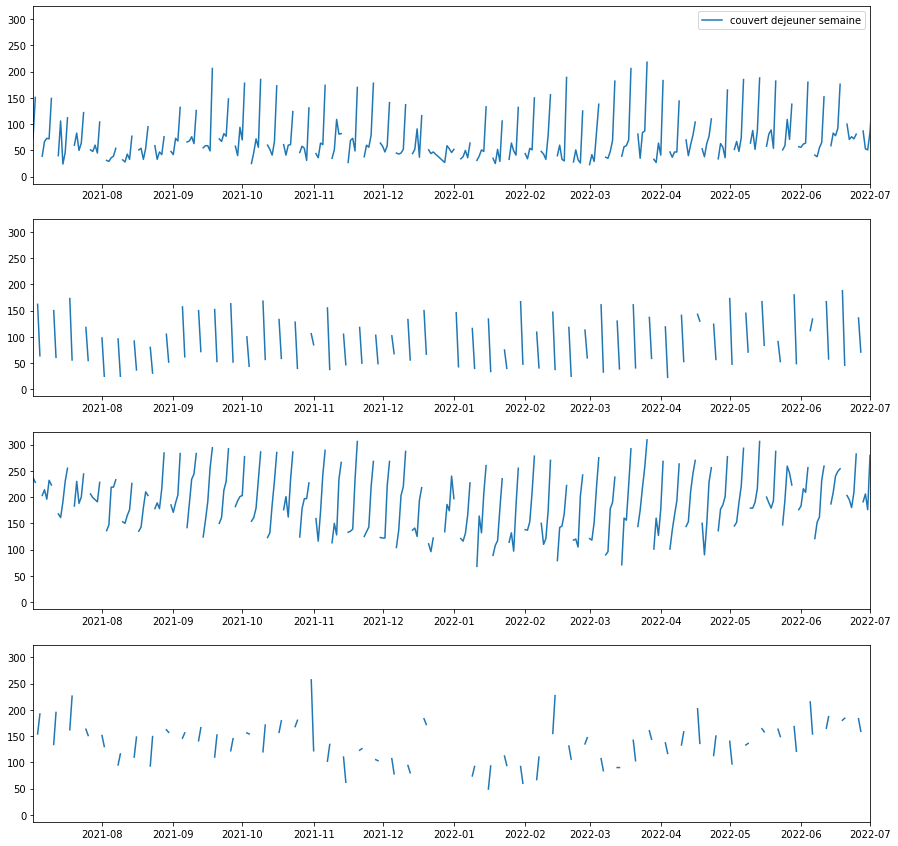

In [13]:
plt.figure(figsize=(15,15),facecolor="w")
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2,sharey=ax1, sharex=ax1)
ax3 = plt.subplot(4,1,3,sharey=ax1)
ax4 = plt.subplot(4,1,4,sharey=ax1, sharex=ax3)
ax1.set_xlim([start_date,end_date])
ax2.set_xlim([start_date,end_date])
ax3.set_xlim([start_date,end_date])
ax4.set_xlim([start_date,end_date])

# ax1.plot([s for s in couvert_weekday_dejeuner if s != None],label='couvert dejeuner semaine')
# ax3.plot([s for s in couvert_weekend_dejeuner if s != None],label='couvert dejeuner week-end')
# ax2.plot([s for s in couvert_weekday_diner if s != None],label='couvert diner semaine')
# ax4.plot([s for s in couvert_weekend_diner if s != None],label='couvert diner week-end')

ax1.plot(date_weekday_dejeuner,couvert_weekday_dejeuner ,label='couvert dejeuner semaine')
# ax1.plot(date_weekday_dejeuner, pd.Series(couvert_weekday_dejeuner).interpolate(method='polynomial', order=2))

ax2.plot(date_weekend_dejeuner,couvert_weekend_dejeuner,label='couvert dejeuner week-end')
ax3.plot(date_weekday_diner,couvert_weekday_diner ,label='couvert diner semaine')
ax4.plot(date_weekend_diner,couvert_weekend_diner ,label='couvert diner week-end')


ax1.legend()
# ax2.legend()
# ax3.legend()
# ax4.legend()

### Correlation déjeuner/diner

In [14]:

a=[s for s in couvert_weekday_diner if s != None]
matrix = np.corrcoef([s for s in couvert_weekday_dejeuner if s != None], a[:len(a)-7])
print(matrix)

b=[s for s in couvert_weekend_diner if s != None]
matrix2 = np.corrcoef([s for s in couvert_weekend_dejeuner if s != None], b)
print(matrix2)


# db_dej_vs_diner=pd.DataFrame()
# db_dej_vs_diner['lundi']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 0),couverts['Couverts'], None) if x !=None]
# db_dej_vs_diner['mardi']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 1),couverts['Couverts'], None) if x !=None]
# db_dej_vs_diner['mercredi']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 2),couverts['Couverts'], None) if x !=None]
# db_dej_vs_diner['jeudi']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 3),couverts['Couverts'], None) if x !=None]
# db_dej_vs_diner['vendredi']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 4),couverts['Couverts'], None) if x !=None]
# db_dej_vs_diner['samedi']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 5),couverts['Couverts'], None) if x !=None]
# db_dej_vs_diner['dimanche']=[x for x in np.where(couverts['Jour'].apply(lambda x: x.weekday() == 6),couverts['Couverts'], None) if x !=None]




# display(db_dej_vs_diner)




[[1.         0.39129655]
 [0.39129655 1.        ]]
[[1.         0.12022756]
 [0.12022756 1.        ]]


## Modèle

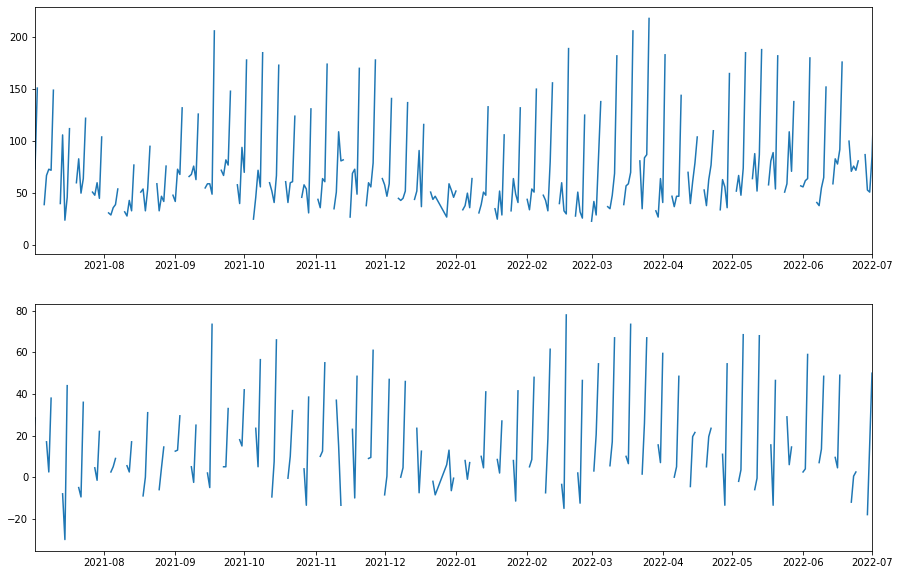

In [15]:
plt.figure(figsize=(15,10),facecolor="w")
ax=plt.subplot(2,1,1)
ax.set_xlim([start_date,end_date])

plt.plot(date_weekday_dejeuner,couvert_weekday_dejeuner ,label='couvert dejeuner semaine')

def custom_derivative(list_value):
    list_derivative=[]
    for i in range( len(list_value)):
        if (i!=0 and i!=len(list_value)-1 and list_value[i]!=None and list_value[i+1]!=None and list_value[i-1]!=None) :
            derive=((list_value[i-1])-(list_value[i+1] ))/2
            list_derivative.append(derive)
        else :
            list_derivative.append(None)

    return list_derivative

ax2=plt.subplot(2,1,2,sharex=ax)
# ax2.set_xlim([start_date,end_date])

plt.plot(date_weekday_dejeuner,custom_derivative(couvert_weekday_dejeuner))



/tmp/ipykernel_69/1420388635.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Min_list_dej_weekday=df_dejeuner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].min()
/tmp/ipykernel_69/1420388635.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Max_list_dej_weekday=df_dejeuner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].max()
/tmp/ipykernel_69/1420388635.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Min_list_diner_weekday=df_diner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].min()
/tmp/ipykernel_69/1420388635.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Max_list_diner_weekday=d

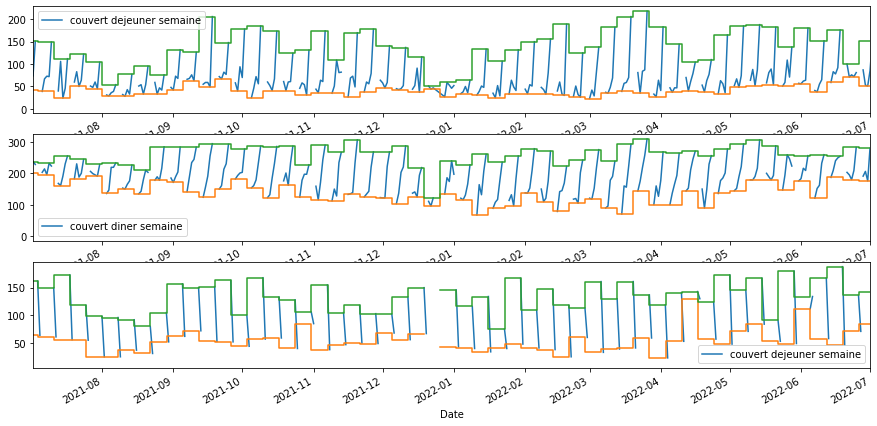

In [16]:
#####Dejeuner semaine#########
df_dejeuner_semaine=pd.DataFrame()
df_dejeuner_semaine['Date']=date_weekday_dejeuner
df_dejeuner_semaine['Couvert']=couvert_weekday_dejeuner
Min_list_dej_weekday=df_dejeuner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].min()
Max_list_dej_weekday=df_dejeuner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].max()


#####Diner semaine############
df_diner_semaine=pd.DataFrame()
df_diner_semaine['Date']=date_weekday_diner
df_diner_semaine['Couvert']=couvert_weekday_diner
Min_list_diner_weekday=df_diner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].min()
Max_list_diner_weekday=df_diner_semaine.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].max()


#####Dejeuner week-end#########
df_dejeuner_weekend=pd.DataFrame()
df_dejeuner_weekend['Date']=date_weekend_dejeuner
df_dejeuner_weekend['Couvert']=couvert_weekend_dejeuner
Min_list_dej_weekend=df_dejeuner_weekend.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].min()
Max_list_dej_weekend=df_dejeuner_weekend.groupby([pd.Grouper(key='Date', freq='W')])['Date','Couvert'].max()


plt.figure(figsize=(15,10),facecolor="w")
ax1=plt.subplot(4,1,1)
ax1.set_xlim([start_date,end_date])
ax1.plot(date_weekday_dejeuner,couvert_weekday_dejeuner ,label='couvert dejeuner semaine')
Min_list_dej_weekday['Couvert'].plot(drawstyle="steps", label='_nolegend_')
Max_list_dej_weekday['Couvert'].plot(drawstyle="steps", label='_nolegend_')

ax2=plt.subplot(4,1,2)
ax2.set_xlim([start_date,end_date])
ax2.plot(date_weekday_diner,couvert_weekday_diner ,label='couvert diner semaine')
Min_list_diner_weekday['Couvert'].plot(drawstyle="steps", label='_nolegend_')
Max_list_diner_weekday['Couvert'].plot(drawstyle="steps", label='_nolegend_')

ax3=plt.subplot(4,1,3)
ax3.set_xlim([start_date,end_date])
ax3.plot(date_weekend_dejeuner,couvert_weekend_dejeuner ,label='couvert dejeuner weekend')
Min_list_dej_weekend['Couvert'].plot(drawstyle="steps", label='_nolegend_')
Max_list_dej_weekend['Couvert'].plot(drawstyle="steps", label='_nolegend_')

ax4=plt.subplot(4,1,4)
ax4.set_xlim([start_date,end_date])
ax4.plot(date_weekend_dejeuner,couvert_weekend_diner ,label='couvert diner weekend')
Min_list_dej_weekend['Couvert'].plot(drawstyle="steps", label='_nolegend_')
Max_list_dej_weekend['Couvert'].plot(drawstyle="steps", label='_nolegend_')


ax1.legend()
ax2.legend()
ax3.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20a32d5b-007a-4f41-921e-cda51e0b10e3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>